Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

     business       0.94      0.97      0.96        79
entertainment       1.00      0.96      0.98        56
     politics       0.99      0.97      0.98        68
        sport       0.96      1.00      0.98        78
         tech       0.98      0.94      0.96        65

     accuracy                           0.97       346
    macro avg       0.97      0.97      0.97       346
 weighted avg       0.97      0.97      0.97       346


Per-Category Accuracy Report:
               Total  Correct  Accuracy
business        79.0     77.0  0.974684
entertainment   56.0     54.0  0.964286
politics        68.0     66.0  0.970588
sport           78.0     78.0  1.000000
tech            65.0     61.0  0.938462


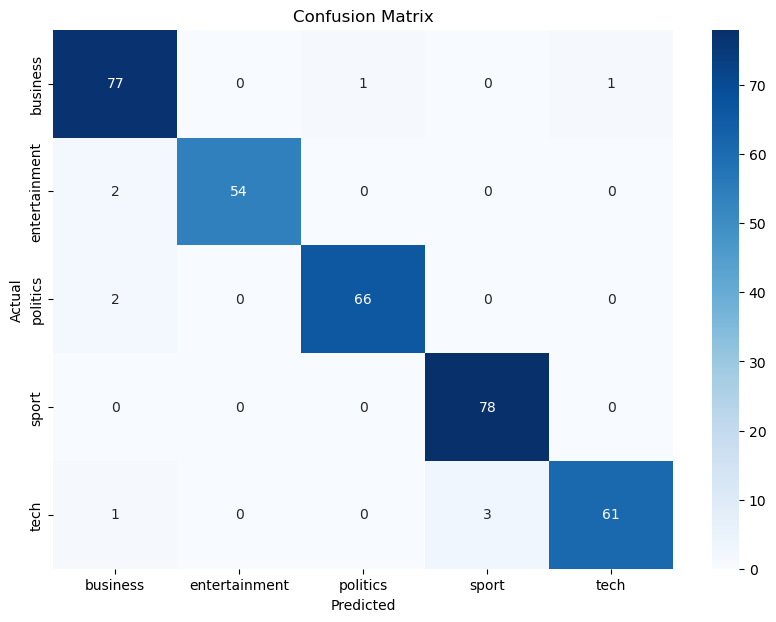

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  # For saving the model

#Convert the CSV files to dataframes. 
data= pd.read_csv('lemmatized_articles.csv')
data2= pd.read_csv('BBC_train_full.csv')

#Gets the tokenized data
x = data['tokens']
#Gets the labels
y = data2['category'].values

#This converts the tokens to a vector so it can be converted to an array later to be read by the bot
vectorizer = CountVectorizer()
x_transformed = vectorizer.fit_transform(x)

#Splits the data into 20% test and 80% train. Random state is the seed used for the randomization.
x_train, x_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.2)




#Classification report
#This report provides detailed metrics about the model's performance
#It includes precision, recall, F1-score, and support for each class
print("\nClassification Report:")
#Generate the report by comparing true labels ('y_test') with predicted labels ('bot_predictions')
print(classification_report(y_test, bot_predictions))

#Creating a per-category accuracy report
def per_category_accuracy(y_true, y_pred):
    #Extract unique categories form the true labels and sort them
    categories = sorted(set(y_true))
    #Initialize a dictionary to hold accuracy metrics for each category
    accuracy_per_category = {}
    
    #Loop over each unique category to evaluate its perormance
    for category in categories:
        #Count the total number of actual instances of this category in the true labels
        actual_count = (y_true == category).sum() 
        #Count the number of instances correctly predicted as this category
        correct_count = ((y_true == category) & (y_pred == category)).sum()
        
        #Calculate the accuracy for the current category
        #Avoid division by zero by checking if actual_count os greater than zero
        accuracy = correct_count / actual_count if actual_count > 0 else 0
       #Store the results in the dictionary with detailed metrics
        accuracy_per_category[category] = {
            'Total': actual_count,
            'Correct': correct_count,
            'Accuracy': accuracy
        }
    #Convert the accuracy dictionary into a Pandas DataFrame for better display
    return pd.DataFrame(accuracy_per_category).T

#Call the function to generate the per-category accuracy report using the true and predicted labels
category_accuracy_report = per_category_accuracy(y_test, bot_predictions)

#Print the per-category accuracy report to analyze the model performance on each class
print("\nPer-Category Accuracy Report:")
print(category_accuracy_report)

#Visualization: Create a confusion Matrix to viaualize the performance of theclassification model
#The confusion matrix summarizes the count of correct and incorrect predictions, which helps identify areas of improvement
confusion_mat = confusion_matrix(y_test, bot_predictions)

#Set up the visual parameters for the confusion matrix plot
plt.figure(figsize=(10, 7))

#Get and sort unique categories for label display in the confusion matrix
unique_categories = sorted(set(y))

#Create a heatmap to represent the confusion matrix visually
#Use annotations to display the counts in each cell with a blue color palette
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(set(y)), yticklabels=sorted(set(y)))

#Label the axes to clarify what is being represented in the confusion matrix
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()



